In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap
import re

In [12]:
results_file_1 = 'runs/cifar10/allconv/vanilla/corruptions.csv'
results_file_2 = 'runs/cifar10/allconv/augmix/corruptions.csv'
results_file_3 = 'runs/cifar10/allconv/clewr_exp+augmix/corruptions.csv'

out_file = 'runs/cifar10/allconv/clewr_exp+augmix/plot_for_corruption.png'

In [13]:
# load mCE values from df1
df1_full = pd.read_csv(results_file_1)
df1 = df1_full[['Corruption', 'mCE']][1:16]
df1 = df1.set_index('Corruption')
df1.head()

# load mCE values from df2
df2_full = pd.read_csv(results_file_2)
df2 = df2_full[['Corruption', 'mCE']][1:16]
df2 = df2.set_index('Corruption')

# load mCE values from df2
df3_full = pd.read_csv(results_file_3)
df3 = df3_full[['Corruption', 'mCE']][1:16]
df3 = df3.set_index('Corruption')

In [14]:
df1 = df1.rename(index={"gaussian_noise": "Gaussian\nNoise", "shot_noise": "Shot\nNoise", "impulse_noise":"Impulse\nNoise", 
                        "defocus_blur":"Defocus\nBlur", "glass_blur":"Glass\nBlur", 
                        "motion_blur":"Motion\nBlur","zoom_blur": "Zoom\nBlur", 
                        "snow": "Snow", "frost":"Frost", "fog": "Fog", 
                        "brightness": "Brightness", "contrast": "Contrast", "elastic_transform": "Elastic", 
                        "pixelate": "Pixelate", "jpeg_compression": "JPEG"})
df2 = df2.rename(index={"gaussian_noise": "Gaussian\nNoise", "shot_noise": "Shot\nNoise", "impulse_noise":"Impulse\nNoise", 
                        "defocus_blur":"Defocus\nBlur", "glass_blur":"Glass\nBlur", 
                        "motion_blur":"Motion\nBlur","zoom_blur": "Zoom\nBlur", 
                        "snow": "Snow", "frost":"Frost", "fog": "Fog", 
                        "brightness": "Brightness", "contrast": "Contrast", "elastic_transform": "Elastic", 
                        "pixelate": "Pixelate", "jpeg_compression": "JPEG"})
df3 = df3.rename(index={"gaussian_noise": "Gaussian\nNoise", "shot_noise": "Shot\nNoise", "impulse_noise":"Impulse\nNoise", 
                        "defocus_blur":"Defocus\nBlur", "glass_blur":"Glass\nBlur", 
                        "motion_blur":"Motion\nBlur","zoom_blur": "Zoom\nBlur", 
                        "snow": "Snow", "frost":"Frost", "fog": "Fog", 
                        "brightness": "Brightness", "contrast": "Contrast", "elastic_transform": "Elastic", 
                        "pixelate": "Pixelate", "jpeg_compression": "JPEG"})


In [15]:
# Join the two DFs
df1_melt = pd.melt(df1.T)
df1_melt['Method'] = 'Vanilla'

df2_melt = pd.melt(df2.T)
df2_melt['Method'] = 'AugMix'

df3_melt = pd.melt(df3.T)
df3_melt['Method'] = 'AugMix+CLEWR'

df_joint = pd.concat((df1_melt, df2_melt, df3_melt))
df_joint.head()

,Corruption,value,Method
0,Gaussian\nNoise,57.434,Vanilla
1,Shot\nNoise,46.044,Vanilla
2,Impulse\nNoise,51.456,Vanilla
3,Defocus\nBlur,23.506,Vanilla
4,Glass\nBlur,51.892,Vanilla


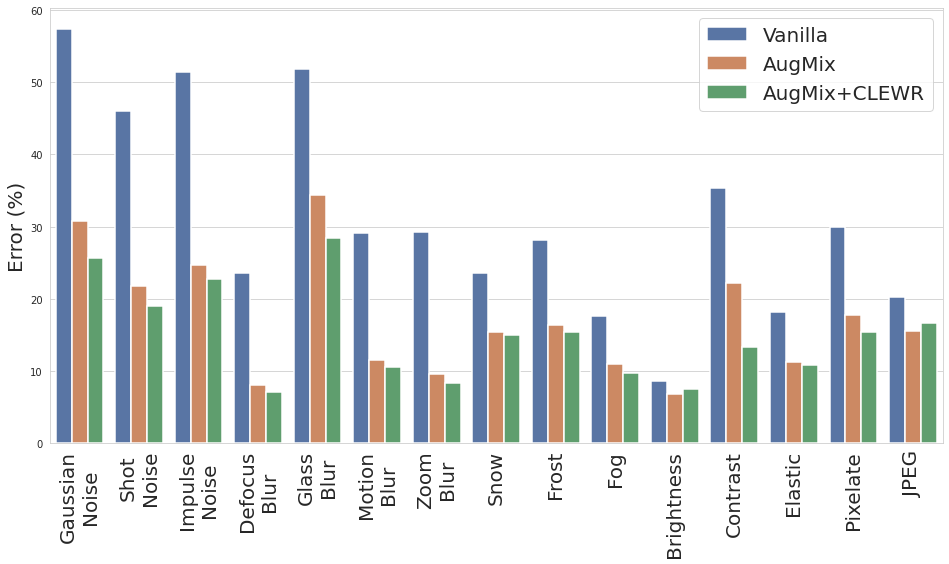

In [16]:
ig, ax = plt.subplots(figsize=(16,8))
sns.set_style('whitegrid')
bp = sns.barplot(x="Corruption", y="value", hue="Method", data=df_joint, palette='deep', ax=ax, linewidth=1.5)
bp.set_xlabel(None)
bp.set_ylabel("Error (%)", fontsize=20)
for item in bp.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(20)
max_width=11
bp.legend(prop={'size':20})

In [17]:
ax.get_figure().savefig(out_file, dpi=300, transparent=False, bbox_inches='tight')